In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
from MuseGAN import MuseGAN
from music21 import midi
from music21 import note, stream, duration
import types
import LoadData as ld

In [2]:
# run params
SECTION = 'compose'
RUN_ID = '001'
DATA_NAME = 'death'
FILENAME = 'data.npz'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))
    os.mkdir(os.path.join(RUN_FOLDER, 'samples'))

##  Instantiating model

In [3]:
mode =  'build'
BATCH_SIZE = 16
n_bars = 2
n_steps_per_bar = 128
n_pitches = 207
n_tracks = 4

data_binary, data_ints, raw_data = ld.loadData(n_bars, n_steps_per_bar)
data_binary = np.squeeze(data_binary)

In [4]:
gan = MuseGAN(input_dim = data_binary.shape[1:]
        , critic_learning_rate = 0.001
        , generator_learning_rate = 0.001
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 32
        , batch_size = BATCH_SIZE
        , n_tracks = n_tracks
        , n_bars = n_bars
        , n_steps_per_bar = n_steps_per_bar
        , n_pitches = n_pitches
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:                 
    gan.load_weights(RUN_FOLDER)

# Summaries

In [5]:
gan.chords_tempNetwork.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
temporal_input (InputLayer)  [(None, 32)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 2, 1, 1024)        66560     
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 1, 1024)        4096      
_________________________________________________________________
activation (Activation)      (None, 2, 1, 1024)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2, 1, 32)          32800     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 1, 32)          128 

In [6]:
gan.barGen[0].summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bar_generator_input (InputLa [(None, 128)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization_10 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_10 (Activation)   (None, 1024)              0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 2, 1, 512)         0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 32, 1, 512)        4194816   
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 1, 512)        2048

In [7]:
gan.generator.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
melody_input (InputLayer)       [(None, 4, 32)]      0                                            
__________________________________________________________________________________________________
chords_input (InputLayer)       [(None, 32)]         0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32)           0           melody_input[0][0]               
___________________________________________________________________________________________

In [8]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 2, 128, 207, 4)]  0         
_________________________________________________________________
conv3d (Conv3D)              multiple                  1152      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
conv3d_1 (Conv3D)            multiple                  16512     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
conv3d_2 (Conv3D)            multiple                  196736    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

# Train

In [9]:
gan.epoch = 0
gan.train(     
    data_binary
    , batch_size = BATCH_SIZE
    , epochs = 3000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
)

0 (5, 1) [D loss: (-12.8)(R -21.0, F -0.7, G 0.9)] [G loss: -7.5]


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1 (5, 1) [D loss: (-4905.2)(R -9988.7, F -234.7, G 531.8)] [G loss: -528.5]
2 (5, 1) [D loss: (-1803.8)(R -1805.1, F -78.1, G 7.9)] [G loss: -587.0]
3 (5, 1) [D loss: (-2514.1)(R -2679.8, F -63.8, G 23.0)] [G loss: -1387.1]
4 (5, 1) [D loss: (-4216.6)(R -5302.8, F -209.8, G 129.6)] [G loss: -3578.1]
5 (5, 1) [D loss: (-3784.7)(R -6199.0, F -344.4, G 275.9)] [G loss: -3908.2]
6 (5, 1) [D loss: (-2341.0)(R -5368.4, F -244.8, G 327.2)] [G loss: -4386.5]
7 (5, 1) [D loss: (-1923.5)(R -3403.8, F 45.9, G 143.4)] [G loss: -3433.2]
8 (5, 1) [D loss: (-1085.1)(R -3262.0, F 1118.8, G 105.8)] [G loss: -3373.1]
9 (5, 1) [D loss: (-399.5)(R -2184.4, F 1345.6, G 43.9)] [G loss: -2536.1]
10 (5, 1) [D loss: (-75.4)(R 411.7, F -487.2, G 0.0)] [G loss: 310.4]
11 (5, 1) [D loss: (-141.3)(R 1259.4, F -1400.7, G 0.0)] [G loss: 2165.2]
12 (5, 1) [D loss: (-651.9)(R 5760.3, F -6632.9, G 22.1)] [G loss: 7973.3]
13 (5, 1) [D loss: (-1195.2)(R 16602.7, F -18700.4, G 90.3)] [G loss: 22854.2]
14 (5, 1) [D loss: (

115 (5, 1) [D loss: (-49.7)(R 986.4, F -1039.8, G 0.4)] [G loss: 1428.9]
116 (5, 1) [D loss: (-80.3)(R 1353.8, F -1469.5, G 3.5)] [G loss: 1628.7]
117 (5, 1) [D loss: (-48.7)(R 762.0, F -816.5, G 0.6)] [G loss: 1085.8]
118 (5, 1) [D loss: (-54.3)(R 563.0, F -649.2, G 3.2)] [G loss: 335.1]
119 (5, 1) [D loss: (-85.3)(R 2135.2, F -2268.7, G 4.8)] [G loss: 2477.2]
120 (5, 1) [D loss: (-70.0)(R 1575.1, F -1648.2, G 0.3)] [G loss: 1567.4]
121 (5, 1) [D loss: (-111.2)(R 3180.6, F -3315.7, G 2.4)] [G loss: 4640.2]
122 (5, 1) [D loss: (-91.1)(R 2650.3, F -2789.7, G 4.8)] [G loss: 3640.1]
123 (5, 1) [D loss: (-106.6)(R 4389.0, F -4536.0, G 4.0)] [G loss: 6216.2]
124 (5, 1) [D loss: (-91.8)(R 3820.7, F -3946.3, G 3.4)] [G loss: 5237.2]
125 (5, 1) [D loss: (-106.1)(R 5057.5, F -5201.6, G 3.8)] [G loss: 7195.3]
126 (5, 1) [D loss: (-114.7)(R 4969.6, F -5138.9, G 5.5)] [G loss: 6433.3]
127 (5, 1) [D loss: (-111.0)(R 6483.2, F -6669.9, G 7.6)] [G loss: 5870.1]
128 (5, 1) [D loss: (-140.7)(R 7733.4, 

225 (5, 1) [D loss: (-111.2)(R 5149.2, F -5321.7, G 6.1)] [G loss: 5712.1]
226 (5, 1) [D loss: (-93.1)(R 4759.0, F -4918.1, G 6.6)] [G loss: 5350.5]
227 (5, 1) [D loss: (-86.2)(R 4387.4, F -4546.4, G 7.3)] [G loss: 3316.8]
228 (5, 1) [D loss: (-95.8)(R 4129.7, F -4266.3, G 4.1)] [G loss: 4842.5]
229 (5, 1) [D loss: (-96.4)(R 3505.0, F -3628.7, G 2.7)] [G loss: 4073.8]
230 (5, 1) [D loss: (-81.3)(R 5195.6, F -5376.6, G 10.0)] [G loss: 3389.9]
231 (5, 1) [D loss: (-93.2)(R 4600.3, F -4760.0, G 6.7)] [G loss: 4084.8]
232 (5, 1) [D loss: (-98.9)(R 4171.4, F -4326.6, G 5.6)] [G loss: 4731.2]
233 (5, 1) [D loss: (-98.2)(R 4212.2, F -4363.1, G 5.3)] [G loss: 4068.3]
234 (5, 1) [D loss: (-104.6)(R 4136.8, F -4277.5, G 3.6)] [G loss: 4657.6]
235 (5, 1) [D loss: (-108.4)(R 4573.3, F -4733.4, G 5.2)] [G loss: 5841.0]
236 (5, 1) [D loss: (-95.4)(R 4106.9, F -4265.9, G 6.4)] [G loss: 4070.6]
237 (5, 1) [D loss: (-97.2)(R 4477.3, F -4651.0, G 7.6)] [G loss: 3609.1]
238 (5, 1) [D loss: (-99.4)(R 3381

337 (5, 1) [D loss: (-80.0)(R 725.4, F -852.7, G 4.7)] [G loss: 957.8]
338 (5, 1) [D loss: (-96.0)(R 483.4, F -625.7, G 4.6)] [G loss: 629.8]
339 (5, 1) [D loss: (-79.8)(R 501.1, F -592.3, G 1.1)] [G loss: 647.8]
340 (5, 1) [D loss: (-77.4)(R 324.8, F -415.0, G 1.3)] [G loss: 511.6]
341 (5, 1) [D loss: (-87.2)(R 731.5, F -860.0, G 4.1)] [G loss: 1006.5]
342 (5, 1) [D loss: (-96.3)(R 700.2, F -834.8, G 3.8)] [G loss: 880.9]
343 (5, 1) [D loss: (-74.5)(R 762.3, F -886.8, G 5.0)] [G loss: 856.3]
344 (5, 1) [D loss: (-78.0)(R 629.5, F -754.8, G 4.7)] [G loss: 656.5]
345 (5, 1) [D loss: (-90.1)(R 494.4, F -610.0, G 2.5)] [G loss: 921.5]
346 (5, 1) [D loss: (-76.8)(R 508.7, F -611.1, G 2.6)] [G loss: 606.1]
347 (5, 1) [D loss: (-90.2)(R 549.6, F -682.8, G 4.3)] [G loss: 727.8]
348 (5, 1) [D loss: (-93.0)(R 539.3, F -662.8, G 3.0)] [G loss: 833.6]
349 (5, 1) [D loss: (-88.4)(R 761.3, F -903.2, G 5.4)] [G loss: 799.9]
350 (5, 1) [D loss: (-93.7)(R 602.8, F -735.2, G 3.9)] [G loss: 894.2]
351 (

452 (5, 1) [D loss: (-104.4)(R 433.7, F -591.8, G 5.4)] [G loss: 546.4]
453 (5, 1) [D loss: (-110.6)(R 286.9, F -469.6, G 7.2)] [G loss: 470.4]
454 (5, 1) [D loss: (-84.0)(R 222.6, F -371.1, G 6.4)] [G loss: 363.7]
455 (5, 1) [D loss: (-104.6)(R 333.1, F -483.2, G 4.5)] [G loss: 487.4]
456 (5, 1) [D loss: (-93.8)(R 232.5, F -367.4, G 4.1)] [G loss: 432.8]
457 (5, 1) [D loss: (-100.1)(R 483.2, F -636.0, G 5.3)] [G loss: 628.6]
458 (5, 1) [D loss: (-117.7)(R 276.7, F -441.7, G 4.7)] [G loss: 498.8]
459 (5, 1) [D loss: (-104.0)(R 316.0, F -460.0, G 4.0)] [G loss: 538.8]
460 (5, 1) [D loss: (-106.1)(R 158.8, F -302.9, G 3.8)] [G loss: 376.9]
461 (5, 1) [D loss: (-101.8)(R 245.1, F -447.0, G 10.0)] [G loss: 324.6]
462 (5, 1) [D loss: (-99.6)(R 271.0, F -463.8, G 9.3)] [G loss: 327.0]
463 (5, 1) [D loss: (-120.1)(R 327.8, F -523.5, G 7.6)] [G loss: 467.9]
464 (5, 1) [D loss: (-110.7)(R 364.9, F -561.1, G 8.6)] [G loss: 514.7]
465 (5, 1) [D loss: (-98.4)(R 231.0, F -382.8, G 5.3)] [G loss: 41

567 (5, 1) [D loss: (-108.4)(R 176.0, F -312.6, G 2.8)] [G loss: 382.4]
568 (5, 1) [D loss: (-113.2)(R 224.1, F -401.0, G 6.4)] [G loss: 366.5]
569 (5, 1) [D loss: (-97.5)(R 184.0, F -362.2, G 8.1)] [G loss: 315.4]
570 (5, 1) [D loss: (-99.8)(R 147.4, F -295.8, G 4.9)] [G loss: 259.9]
571 (5, 1) [D loss: (-111.1)(R 246.6, F -408.3, G 5.1)] [G loss: 400.0]
572 (5, 1) [D loss: (-94.7)(R 267.8, F -435.4, G 7.3)] [G loss: 362.8]
573 (5, 1) [D loss: (-120.7)(R 168.5, F -324.4, G 3.5)] [G loss: 469.4]
574 (5, 1) [D loss: (-111.1)(R 60.8, F -256.0, G 8.4)] [G loss: 170.2]
575 (5, 1) [D loss: (-113.3)(R 136.6, F -308.3, G 5.8)] [G loss: 345.7]
576 (5, 1) [D loss: (-119.0)(R 275.2, F -444.2, G 5.0)] [G loss: 591.7]
577 (5, 1) [D loss: (-113.8)(R 250.1, F -448.3, G 8.4)] [G loss: 384.9]
578 (5, 1) [D loss: (-97.8)(R 133.8, F -311.6, G 8.0)] [G loss: 234.5]
579 (5, 1) [D loss: (-111.9)(R 213.0, F -365.3, G 4.0)] [G loss: 356.9]
580 (5, 1) [D loss: (-100.3)(R 202.4, F -335.7, G 3.3)] [G loss: 381.

682 (5, 1) [D loss: (-114.9)(R 84.8, F -244.1, G 4.4)] [G loss: 273.7]
683 (5, 1) [D loss: (-105.9)(R 19.1, F -242.1, G 11.7)] [G loss: 171.1]
684 (5, 1) [D loss: (-119.3)(R 110.5, F -293.2, G 6.3)] [G loss: 288.5]
685 (5, 1) [D loss: (-115.1)(R 56.0, F -223.3, G 5.2)] [G loss: 219.2]
686 (5, 1) [D loss: (-115.2)(R 89.4, F -245.1, G 4.0)] [G loss: 289.0]
687 (5, 1) [D loss: (-117.9)(R 110.2, F -291.4, G 6.3)] [G loss: 290.1]
688 (5, 1) [D loss: (-120.4)(R 46.7, F -221.0, G 5.4)] [G loss: 252.9]
689 (5, 1) [D loss: (-104.6)(R 140.7, F -325.7, G 8.0)] [G loss: 299.6]
690 (5, 1) [D loss: (-110.2)(R 89.6, F -304.5, G 10.5)] [G loss: 251.8]
691 (5, 1) [D loss: (-126.1)(R 112.3, F -303.8, G 6.5)] [G loss: 283.7]
692 (5, 1) [D loss: (-115.5)(R 72.0, F -245.8, G 5.8)] [G loss: 194.9]
693 (5, 1) [D loss: (-118.6)(R 79.6, F -241.3, G 4.3)] [G loss: 266.9]
694 (5, 1) [D loss: (-114.6)(R 74.6, F -256.1, G 6.7)] [G loss: 230.3]
695 (5, 1) [D loss: (-112.1)(R 121.6, F -305.1, G 7.1)] [G loss: 256.1]

797 (5, 1) [D loss: (-121.5)(R 54.3, F -252.3, G 7.7)] [G loss: 241.0]
798 (5, 1) [D loss: (-117.2)(R 47.0, F -231.9, G 6.8)] [G loss: 222.2]
799 (5, 1) [D loss: (-131.4)(R 60.6, F -286.0, G 9.4)] [G loss: 269.2]
800 (5, 1) [D loss: (-130.9)(R 61.3, F -241.6, G 4.9)] [G loss: 293.5]
801 (5, 1) [D loss: (-128.3)(R 38.4, F -223.0, G 5.6)] [G loss: 232.7]
802 (5, 1) [D loss: (-128.2)(R 55.3, F -235.6, G 5.2)] [G loss: 261.3]
803 (5, 1) [D loss: (-118.8)(R 58.2, F -267.2, G 9.0)] [G loss: 258.5]
804 (5, 1) [D loss: (-112.5)(R 27.1, F -176.2, G 3.7)] [G loss: 230.5]
805 (5, 1) [D loss: (-118.9)(R 88.0, F -250.2, G 4.3)] [G loss: 226.6]
806 (5, 1) [D loss: (-114.4)(R 16.2, F -222.0, G 9.1)] [G loss: 339.3]
807 (5, 1) [D loss: (-111.2)(R -4.7, F -163.4, G 5.7)] [G loss: 184.2]
808 (5, 1) [D loss: (-124.9)(R 46.9, F -243.9, G 7.2)] [G loss: 263.0]
809 (5, 1) [D loss: (-108.8)(R 67.0, F -280.6, G 10.5)] [G loss: 201.5]
810 (5, 1) [D loss: (-122.0)(R 43.7, F -251.3, G 8.6)] [G loss: 208.2]
811 (

913 (5, 1) [D loss: (-123.6)(R 70.3, F -255.3, G 6.1)] [G loss: 299.2]
914 (5, 1) [D loss: (-119.7)(R 46.0, F -208.2, G 4.2)] [G loss: 247.4]
915 (5, 1) [D loss: (-119.5)(R 36.3, F -213.3, G 5.7)] [G loss: 241.5]
916 (5, 1) [D loss: (-109.3)(R 40.6, F -216.1, G 6.6)] [G loss: 217.5]
917 (5, 1) [D loss: (-121.5)(R 66.5, F -249.6, G 6.2)] [G loss: 224.3]
918 (5, 1) [D loss: (-120.7)(R 114.1, F -302.4, G 6.8)] [G loss: 270.4]
919 (5, 1) [D loss: (-112.3)(R 43.0, F -222.8, G 6.7)] [G loss: 231.5]
920 (5, 1) [D loss: (-118.2)(R 31.4, F -219.6, G 7.0)] [G loss: 214.8]
921 (5, 1) [D loss: (-124.7)(R 31.1, F -217.8, G 6.2)] [G loss: 247.5]
922 (5, 1) [D loss: (-112.5)(R 47.6, F -197.2, G 3.7)] [G loss: 213.2]
923 (5, 1) [D loss: (-103.0)(R 7.5, F -228.2, G 11.8)] [G loss: 215.5]
924 (5, 1) [D loss: (-106.0)(R 7.0, F -218.4, G 10.5)] [G loss: 205.7]
925 (5, 1) [D loss: (-117.3)(R -6.4, F -189.6, G 7.9)] [G loss: 252.7]
926 (5, 1) [D loss: (-112.1)(R 57.4, F -239.5, G 7.0)] [G loss: 227.4]
927 (

1028 (5, 1) [D loss: (-115.7)(R 38.9, F -210.4, G 5.6)] [G loss: 233.4]
1029 (5, 1) [D loss: (-120.6)(R 26.6, F -199.5, G 5.2)] [G loss: 194.3]
1030 (5, 1) [D loss: (-120.2)(R -43.8, F -147.7, G 7.1)] [G loss: 195.4]
1031 (5, 1) [D loss: (-126.9)(R 12.1, F -191.5, G 5.2)] [G loss: 195.3]
1032 (5, 1) [D loss: (-111.7)(R 4.8, F -199.7, G 8.3)] [G loss: 209.5]
1033 (5, 1) [D loss: (-124.6)(R 5.4, F -190.6, G 6.1)] [G loss: 240.5]
1034 (5, 1) [D loss: (-113.3)(R -9.0, F -194.7, G 9.0)] [G loss: 159.9]
1035 (5, 1) [D loss: (-118.3)(R 50.4, F -243.8, G 7.5)] [G loss: 206.0]
1036 (5, 1) [D loss: (-123.5)(R 20.9, F -209.9, G 6.6)] [G loss: 189.9]
1037 (5, 1) [D loss: (-112.3)(R 1.4, F -193.1, G 7.9)] [G loss: 156.8]
1038 (5, 1) [D loss: (-118.8)(R 22.9, F -197.3, G 5.6)] [G loss: 217.7]
1039 (5, 1) [D loss: (-120.5)(R -62.7, F -140.5, G 8.3)] [G loss: 169.0]
1040 (5, 1) [D loss: (-121.9)(R 20.1, F -201.6, G 6.0)] [G loss: 239.6]
1041 (5, 1) [D loss: (-127.5)(R 8.8, F -196.7, G 6.0)] [G loss: 2

1141 (5, 1) [D loss: (-122.3)(R -50.7, F -124.6, G 5.3)] [G loss: 168.7]
1142 (5, 1) [D loss: (-108.5)(R -52.4, F -113.2, G 5.7)] [G loss: 142.7]
1143 (5, 1) [D loss: (-109.4)(R -94.7, F -133.0, G 11.8)] [G loss: 145.5]
1144 (5, 1) [D loss: (-123.9)(R -18.8, F -149.0, G 4.4)] [G loss: 136.7]
1145 (5, 1) [D loss: (-109.7)(R -28.7, F -152.4, G 7.1)] [G loss: 152.8]
1146 (5, 1) [D loss: (-124.7)(R 4.3, F -170.6, G 4.2)] [G loss: 202.5]
1147 (5, 1) [D loss: (-115.9)(R -17.8, F -187.8, G 9.0)] [G loss: 134.1]
1148 (5, 1) [D loss: (-129.6)(R -1.4, F -181.8, G 5.4)] [G loss: 187.0]
1149 (5, 1) [D loss: (-130.7)(R -102.6, F -96.9, G 6.9)] [G loss: 126.3]
1150 (5, 1) [D loss: (-120.1)(R -15.4, F -165.8, G 6.1)] [G loss: 160.4]
1151 (5, 1) [D loss: (-127.4)(R -15.7, F -180.7, G 6.9)] [G loss: 192.4]
1152 (5, 1) [D loss: (-120.7)(R -83.8, F -105.0, G 6.8)] [G loss: 118.1]
1153 (5, 1) [D loss: (-126.6)(R -55.1, F -136.3, G 6.5)] [G loss: 139.4]
1154 (5, 1) [D loss: (-109.1)(R -40.2, F -157.1, G 8.

1254 (5, 1) [D loss: (-120.7)(R -102.9, F -76.1, G 5.8)] [G loss: 55.6]
1255 (5, 1) [D loss: (-116.8)(R -17.0, F -142.1, G 4.2)] [G loss: 95.8]
1256 (5, 1) [D loss: (-119.8)(R -99.4, F -81.1, G 6.1)] [G loss: 79.5]
1257 (5, 1) [D loss: (-118.2)(R -46.3, F -118.9, G 4.7)] [G loss: 110.1]
1258 (5, 1) [D loss: (-123.2)(R -58.9, F -144.9, G 8.1)] [G loss: 99.3]
1259 (5, 1) [D loss: (-113.0)(R -80.5, F -134.7, G 10.2)] [G loss: 125.7]
1260 (5, 1) [D loss: (-118.5)(R -102.3, F -81.5, G 6.5)] [G loss: 95.4]
1261 (5, 1) [D loss: (-116.6)(R -73.8, F -108.3, G 6.5)] [G loss: 78.1]
1262 (5, 1) [D loss: (-113.7)(R -41.2, F -151.7, G 7.9)] [G loss: 99.9]
1263 (5, 1) [D loss: (-111.4)(R -98.6, F -85.4, G 7.3)] [G loss: 77.8]
1264 (5, 1) [D loss: (-144.0)(R -148.4, F -91.7, G 9.6)] [G loss: 144.7]
1265 (5, 1) [D loss: (-104.7)(R -136.0, F -103.6, G 13.5)] [G loss: 96.4]
1266 (5, 1) [D loss: (-119.0)(R -101.6, F -83.8, G 6.6)] [G loss: 79.7]
1267 (5, 1) [D loss: (-117.4)(R -135.0, F -87.2, G 10.5)] [G

1368 (5, 1) [D loss: (-128.3)(R -118.6, F -65.6, G 5.6)] [G loss: 56.4]
1369 (5, 1) [D loss: (-118.6)(R -127.8, F -45.2, G 5.4)] [G loss: 56.7]
1370 (5, 1) [D loss: (-127.1)(R -100.0, F -73.1, G 4.6)] [G loss: 68.1]
1371 (5, 1) [D loss: (-119.2)(R -140.7, F -65.5, G 8.7)] [G loss: 102.3]
1372 (5, 1) [D loss: (-123.1)(R -130.8, F -75.5, G 8.3)] [G loss: 118.8]
1373 (5, 1) [D loss: (-120.1)(R -88.7, F -75.2, G 4.4)] [G loss: 55.8]
1374 (5, 1) [D loss: (-124.6)(R -159.1, F -47.7, G 8.2)] [G loss: 42.6]
1375 (5, 1) [D loss: (-115.0)(R -160.9, F -54.5, G 10.0)] [G loss: 76.5]
1376 (5, 1) [D loss: (-120.5)(R -128.3, F -73.3, G 8.1)] [G loss: 76.8]
1377 (5, 1) [D loss: (-121.2)(R -131.6, F -62.2, G 7.3)] [G loss: 68.7]
1378 (5, 1) [D loss: (-107.1)(R -196.2, F -8.1, G 9.7)] [G loss: 64.4]
1379 (5, 1) [D loss: (-116.9)(R -112.1, F -54.9, G 5.0)] [G loss: 38.2]
1380 (5, 1) [D loss: (-131.6)(R -133.4, F -50.5, G 5.2)] [G loss: 34.1]
1381 (5, 1) [D loss: (-119.3)(R -174.8, F -26.2, G 8.2)] [G los

1482 (5, 1) [D loss: (-119.3)(R -125.5, F -55.4, G 6.2)] [G loss: 51.8]
1483 (5, 1) [D loss: (-109.8)(R -115.3, F -60.1, G 6.6)] [G loss: 51.4]
1484 (5, 1) [D loss: (-135.5)(R -144.9, F -46.3, G 5.6)] [G loss: 46.0]
1485 (5, 1) [D loss: (-123.0)(R -168.7, F -27.1, G 7.3)] [G loss: 20.6]
1486 (5, 1) [D loss: (-119.6)(R -163.9, F -37.1, G 8.1)] [G loss: 24.2]
1487 (5, 1) [D loss: (-111.4)(R -126.2, F -50.2, G 6.5)] [G loss: 56.5]
1488 (5, 1) [D loss: (-120.0)(R -171.2, F -39.7, G 9.1)] [G loss: 51.9]
1489 (5, 1) [D loss: (-118.9)(R -156.0, F -34.6, G 7.2)] [G loss: 37.0]
1490 (5, 1) [D loss: (-114.8)(R -117.8, F -46.4, G 4.9)] [G loss: 58.3]
1491 (5, 1) [D loss: (-114.2)(R -157.5, F -15.6, G 5.9)] [G loss: 19.3]
1492 (5, 1) [D loss: (-112.2)(R -158.8, F -32.8, G 7.9)] [G loss: 67.1]
1493 (5, 1) [D loss: (-114.5)(R -181.5, F -48.1, G 11.5)] [G loss: 50.0]
1494 (5, 1) [D loss: (-115.9)(R -139.0, F -37.6, G 6.1)] [G loss: 64.7]
1495 (5, 1) [D loss: (-117.0)(R -143.7, F -43.4, G 7.0)] [G los

1596 (5, 1) [D loss: (-114.7)(R -187.7, F -20.7, G 9.4)] [G loss: 39.0]
1597 (5, 1) [D loss: (-126.7)(R -150.9, F -19.7, G 4.4)] [G loss: 11.7]
1598 (5, 1) [D loss: (-118.2)(R -178.5, F -20.6, G 8.1)] [G loss: 25.1]
1599 (5, 1) [D loss: (-120.2)(R -176.4, F -12.6, G 6.9)] [G loss: 13.9]
1600 (5, 1) [D loss: (-119.5)(R -103.6, F -67.5, G 5.2)] [G loss: 58.4]
1601 (5, 1) [D loss: (-143.8)(R -173.2, F -32.4, G 6.2)] [G loss: 30.9]
1602 (5, 1) [D loss: (-117.5)(R -195.9, F 22.4, G 5.6)] [G loss: -24.1]
1603 (5, 1) [D loss: (-132.4)(R -189.0, F -29.8, G 8.6)] [G loss: 54.8]
1604 (5, 1) [D loss: (-126.5)(R -164.3, F -14.4, G 5.2)] [G loss: 18.3]
1605 (5, 1) [D loss: (-131.5)(R -174.6, F -42.7, G 8.6)] [G loss: 41.9]
1606 (5, 1) [D loss: (-118.3)(R -118.1, F -46.3, G 4.6)] [G loss: 43.4]
1607 (5, 1) [D loss: (-114.7)(R -202.9, F -25.0, G 11.3)] [G loss: 25.5]
1608 (5, 1) [D loss: (-114.5)(R -162.5, F -32.6, G 8.1)] [G loss: 42.0]
1609 (5, 1) [D loss: (-134.5)(R -151.4, F -45.0, G 6.2)] [G los

1711 (5, 1) [D loss: (-132.2)(R -220.7, F -15.6, G 10.4)] [G loss: 24.9]
1712 (5, 1) [D loss: (-115.2)(R -222.4, F 10.6, G 9.7)] [G loss: 14.2]
1713 (5, 1) [D loss: (-132.0)(R -197.3, F -15.5, G 8.1)] [G loss: 1.1]
1714 (5, 1) [D loss: (-119.7)(R -136.3, F -47.2, G 6.4)] [G loss: 26.5]
1715 (5, 1) [D loss: (-113.8)(R -217.5, F -5.9, G 11.0)] [G loss: 36.3]
1716 (5, 1) [D loss: (-118.9)(R -175.4, F -14.1, G 7.1)] [G loss: 17.6]
1717 (5, 1) [D loss: (-108.8)(R -105.4, F -44.7, G 4.1)] [G loss: 10.0]
1718 (5, 1) [D loss: (-114.0)(R -205.0, F 0.2, G 9.1)] [G loss: 19.1]
1719 (5, 1) [D loss: (-125.7)(R -180.6, F 3.9, G 5.1)] [G loss: -4.7]
1720 (5, 1) [D loss: (-116.1)(R -180.9, F -17.9, G 8.3)] [G loss: 25.4]
1721 (5, 1) [D loss: (-134.4)(R -177.0, F -20.7, G 6.3)] [G loss: 29.1]
1722 (5, 1) [D loss: (-120.1)(R -180.1, F -59.3, G 11.9)] [G loss: -18.6]
1723 (5, 1) [D loss: (-129.2)(R -101.3, F -116.0, G 8.8)] [G loss: 85.1]
1724 (5, 1) [D loss: (-123.9)(R -144.8, F -41.3, G 6.2)] [G loss: 

1826 (5, 1) [D loss: (-129.3)(R -180.1, F -9.1, G 6.0)] [G loss: -7.4]
1827 (5, 1) [D loss: (-120.9)(R -168.9, F -36.2, G 8.4)] [G loss: 35.5]
1828 (5, 1) [D loss: (-133.1)(R -187.1, F -13.7, G 6.8)] [G loss: -0.3]
1829 (5, 1) [D loss: (-130.2)(R -191.0, F -6.8, G 6.8)] [G loss: 26.5]
1830 (5, 1) [D loss: (-126.0)(R -183.5, F 2.1, G 5.5)] [G loss: 10.0]
1831 (5, 1) [D loss: (-115.3)(R -196.8, F -30.7, G 11.2)] [G loss: 21.8]
1832 (5, 1) [D loss: (-131.1)(R -201.2, F -1.5, G 7.2)] [G loss: 8.0]
1833 (5, 1) [D loss: (-130.2)(R -203.1, F 1.0, G 7.2)] [G loss: 28.6]
1834 (5, 1) [D loss: (-127.3)(R -175.9, F -9.6, G 5.8)] [G loss: 13.3]
1835 (5, 1) [D loss: (-119.8)(R -202.5, F -17.8, G 10.1)] [G loss: -2.2]
1836 (5, 1) [D loss: (-125.3)(R -232.5, F 4.0, G 10.3)] [G loss: 3.3]
1837 (5, 1) [D loss: (-128.1)(R -187.4, F -0.5, G 6.0)] [G loss: -29.8]
1838 (5, 1) [D loss: (-124.2)(R -164.7, F -34.8, G 7.5)] [G loss: 21.3]
1839 (5, 1) [D loss: (-135.0)(R -168.2, F -21.6, G 5.5)] [G loss: 24.3]
1

1942 (5, 1) [D loss: (-125.9)(R -150.0, F -37.7, G 6.2)] [G loss: 36.5]
1943 (5, 1) [D loss: (-128.4)(R -224.4, F 7.6, G 8.8)] [G loss: -19.0]
1944 (5, 1) [D loss: (-136.0)(R -197.8, F -0.6, G 6.2)] [G loss: 11.4]
1945 (5, 1) [D loss: (-126.9)(R -187.0, F -9.3, G 6.9)] [G loss: 28.1]
1946 (5, 1) [D loss: (-130.8)(R -196.4, F 16.9, G 4.9)] [G loss: -8.9]
1947 (5, 1) [D loss: (-129.8)(R -185.7, F -11.8, G 6.8)] [G loss: 6.9]
1948 (5, 1) [D loss: (-113.1)(R -243.9, F 8.8, G 12.2)] [G loss: 3.8]
1949 (5, 1) [D loss: (-126.0)(R -188.8, F 6.5, G 5.6)] [G loss: -12.1]
1950 (5, 1) [D loss: (-131.6)(R -190.5, F -3.6, G 6.2)] [G loss: 3.1]
1951 (5, 1) [D loss: (-141.8)(R -200.7, F -17.8, G 7.7)] [G loss: 24.6]
1952 (5, 1) [D loss: (-126.7)(R -147.2, F -32.5, G 5.3)] [G loss: 11.1]
1953 (5, 1) [D loss: (-126.2)(R -178.1, F -11.3, G 6.3)] [G loss: 13.1]
1954 (5, 1) [D loss: (-114.7)(R -178.1, F 2.0, G 6.1)] [G loss: -2.5]
1955 (5, 1) [D loss: (-124.0)(R -193.1, F -3.0, G 7.2)] [G loss: 6.4]
1956 (

2058 (5, 1) [D loss: (-127.2)(R -245.4, F 24.2, G 9.4)] [G loss: -7.1]
2059 (5, 1) [D loss: (-126.2)(R -206.6, F 16.5, G 6.4)] [G loss: -18.4]
2060 (5, 1) [D loss: (-107.6)(R -225.9, F 3.2, G 11.5)] [G loss: -0.3]
2061 (5, 1) [D loss: (-124.3)(R -226.0, F 8.4, G 9.3)] [G loss: -1.2]
2062 (5, 1) [D loss: (-127.4)(R -188.1, F 8.8, G 5.2)] [G loss: -4.5]
2063 (5, 1) [D loss: (-135.9)(R -216.9, F 5.1, G 7.6)] [G loss: -0.9]
2064 (5, 1) [D loss: (-128.9)(R -230.7, F -1.7, G 10.4)] [G loss: 9.5]
2065 (5, 1) [D loss: (-122.0)(R -189.7, F 2.5, G 6.5)] [G loss: 4.6]
2066 (5, 1) [D loss: (-119.5)(R -203.3, F 5.0, G 7.9)] [G loss: -11.2]
2067 (5, 1) [D loss: (-136.1)(R -225.9, F 27.1, G 6.3)] [G loss: -37.3]
2068 (5, 1) [D loss: (-121.7)(R -138.9, F -39.4, G 5.7)] [G loss: 11.5]
2069 (5, 1) [D loss: (-126.9)(R -238.1, F 15.4, G 9.6)] [G loss: 9.5]
2070 (5, 1) [D loss: (-132.3)(R -204.1, F 3.8, G 6.8)] [G loss: -0.3]
2071 (5, 1) [D loss: (-121.1)(R -221.8, F 0.4, G 10.0)] [G loss: -3.9]
2072 (5, 1

2174 (5, 1) [D loss: (-128.6)(R -176.4, F -1.8, G 5.0)] [G loss: 7.5]
2175 (5, 1) [D loss: (-125.2)(R -195.4, F 4.7, G 6.5)] [G loss: 7.4]
2176 (5, 1) [D loss: (-122.4)(R -204.0, F 13.2, G 6.8)] [G loss: 2.2]
2177 (5, 1) [D loss: (-119.8)(R -205.6, F 12.7, G 7.3)] [G loss: -5.5]
2178 (5, 1) [D loss: (-126.4)(R -197.6, F 2.0, G 6.9)] [G loss: -9.8]
2179 (5, 1) [D loss: (-131.4)(R -225.0, F 5.4, G 8.8)] [G loss: -14.8]
2180 (5, 1) [D loss: (-135.0)(R -191.9, F 15.4, G 4.2)] [G loss: -17.0]
2181 (5, 1) [D loss: (-136.8)(R -211.1, F 5.6, G 6.9)] [G loss: -5.4]
2182 (5, 1) [D loss: (-125.8)(R -191.0, F -7.7, G 7.3)] [G loss: 17.6]
2183 (5, 1) [D loss: (-124.4)(R -208.3, F 4.3, G 8.0)] [G loss: -9.4]
2184 (5, 1) [D loss: (-135.1)(R -182.6, F -14.8, G 6.2)] [G loss: 13.5]
2185 (5, 1) [D loss: (-132.1)(R -172.9, F -13.9, G 5.5)] [G loss: 17.2]
2186 (5, 1) [D loss: (-140.4)(R -205.5, F 1.6, G 6.3)] [G loss: -11.1]
2187 (5, 1) [D loss: (-113.5)(R -230.3, F 9.3, G 10.7)] [G loss: -10.3]
2188 (5, 

2290 (5, 1) [D loss: (-135.2)(R -174.9, F -10.8, G 5.1)] [G loss: -1.0]
2291 (5, 1) [D loss: (-126.1)(R -232.9, F 1.3, G 10.6)] [G loss: 5.6]
2292 (5, 1) [D loss: (-127.6)(R -226.4, F 3.4, G 9.5)] [G loss: -7.6]
2293 (5, 1) [D loss: (-131.1)(R -212.3, F 8.5, G 7.3)] [G loss: -15.4]
2294 (5, 1) [D loss: (-133.5)(R -189.4, F 3.0, G 5.3)] [G loss: -9.3]
2295 (5, 1) [D loss: (-132.1)(R -215.5, F 19.2, G 6.4)] [G loss: -15.3]
2296 (5, 1) [D loss: (-117.9)(R -209.7, F 7.6, G 8.4)] [G loss: -3.4]
2297 (5, 1) [D loss: (-134.2)(R -194.6, F 4.9, G 5.5)] [G loss: -1.2]
2298 (5, 1) [D loss: (-123.2)(R -250.6, F 19.9, G 10.8)] [G loss: 12.1]
2299 (5, 1) [D loss: (-120.9)(R -245.0, F 5.7, G 11.8)] [G loss: -9.0]
2300 (5, 1) [D loss: (-127.9)(R -198.2, F 2.4, G 6.8)] [G loss: 1.5]
2301 (5, 1) [D loss: (-125.4)(R -193.1, F 13.9, G 5.4)] [G loss: -12.3]
2302 (5, 1) [D loss: (-119.5)(R -191.9, F -4.6, G 7.7)] [G loss: -19.6]
2303 (5, 1) [D loss: (-134.9)(R -246.0, F 21.7, G 9.0)] [G loss: -26.5]
2304 (5

2406 (5, 1) [D loss: (-122.1)(R -220.1, F 11.0, G 8.7)] [G loss: -3.5]
2407 (5, 1) [D loss: (-127.9)(R -239.4, F 5.0, G 10.7)] [G loss: -18.3]
2408 (5, 1) [D loss: (-134.8)(R -215.8, F 12.2, G 6.9)] [G loss: -12.8]
2409 (5, 1) [D loss: (-134.3)(R -279.8, F 29.7, G 11.6)] [G loss: -7.6]
2410 (5, 1) [D loss: (-123.8)(R -212.8, F 20.6, G 6.8)] [G loss: -17.6]
2411 (5, 1) [D loss: (-137.8)(R -174.7, F -10.5, G 4.7)] [G loss: -2.9]
2412 (5, 1) [D loss: (-128.2)(R -210.1, F 15.1, G 6.7)] [G loss: -1.4]
2413 (5, 1) [D loss: (-126.0)(R -185.7, F -7.1, G 6.7)] [G loss: -9.3]
2414 (5, 1) [D loss: (-142.0)(R -214.8, F 17.2, G 5.6)] [G loss: -18.5]
2415 (5, 1) [D loss: (-128.8)(R -231.8, F 15.8, G 8.7)] [G loss: -11.5]
2416 (5, 1) [D loss: (-121.1)(R -191.0, F -6.9, G 7.7)] [G loss: -5.6]
2417 (5, 1) [D loss: (-127.6)(R -193.2, F 9.7, G 5.6)] [G loss: -19.2]
2418 (5, 1) [D loss: (-129.9)(R -205.0, F -2.2, G 7.7)] [G loss: -1.3]
2419 (5, 1) [D loss: (-137.2)(R -284.3, F 39.1, G 10.8)] [G loss: -16.

2522 (5, 1) [D loss: (-136.1)(R -228.4, F 8.1, G 8.4)] [G loss: -14.1]
2523 (5, 1) [D loss: (-144.9)(R -252.7, F 18.4, G 8.9)] [G loss: -27.6]
2524 (5, 1) [D loss: (-155.9)(R -264.0, F 17.2, G 9.1)] [G loss: -33.2]
2525 (5, 1) [D loss: (-128.8)(R -220.4, F -10.6, G 10.2)] [G loss: 12.2]
2526 (5, 1) [D loss: (-131.2)(R -219.0, F 18.4, G 6.9)] [G loss: -7.1]
2527 (5, 1) [D loss: (-136.7)(R -200.5, F 4.9, G 5.9)] [G loss: 0.9]
2528 (5, 1) [D loss: (-127.5)(R -214.8, F 14.1, G 7.3)] [G loss: -21.1]
2529 (5, 1) [D loss: (-118.5)(R -219.7, F 5.0, G 9.6)] [G loss: 3.0]
2530 (5, 1) [D loss: (-122.8)(R -187.4, F 8.6, G 5.6)] [G loss: -11.9]
2531 (5, 1) [D loss: (-123.9)(R -242.9, F 20.9, G 9.8)] [G loss: 12.5]
2532 (5, 1) [D loss: (-128.1)(R -186.8, F -2.3, G 6.1)] [G loss: 8.9]
2533 (5, 1) [D loss: (-136.9)(R -240.9, F 29.1, G 7.5)] [G loss: -29.6]
2534 (5, 1) [D loss: (-136.6)(R -229.9, F 18.1, G 7.5)] [G loss: -17.5]
2535 (5, 1) [D loss: (-129.2)(R -200.9, F -3.2, G 7.5)] [G loss: -9.8]
2536

2637 (5, 1) [D loss: (-134.6)(R -188.5, F -1.8, G 5.6)] [G loss: -22.3]
2638 (5, 1) [D loss: (-132.3)(R -199.6, F -3.3, G 7.1)] [G loss: 1.5]
2639 (5, 1) [D loss: (-137.9)(R -277.3, F 32.7, G 10.7)] [G loss: -4.1]
2640 (5, 1) [D loss: (-132.1)(R -260.7, F 29.1, G 10.0)] [G loss: -17.0]
2641 (5, 1) [D loss: (-138.8)(R -195.7, F -6.1, G 6.3)] [G loss: -8.6]
2642 (5, 1) [D loss: (-120.4)(R -222.5, F 22.9, G 7.9)] [G loss: -17.6]
2643 (5, 1) [D loss: (-149.0)(R -231.0, F 20.8, G 6.1)] [G loss: -43.0]
2644 (5, 1) [D loss: (-128.4)(R -238.3, F 8.8, G 10.1)] [G loss: -5.3]
2645 (5, 1) [D loss: (-124.3)(R -235.5, F 8.2, G 10.3)] [G loss: 0.4]
2646 (5, 1) [D loss: (-141.7)(R -235.8, F 19.9, G 7.4)] [G loss: -7.9]
2647 (5, 1) [D loss: (-133.2)(R -201.9, F 1.3, G 6.7)] [G loss: -1.1]
2648 (5, 1) [D loss: (-128.4)(R -229.3, F 21.1, G 8.0)] [G loss: 0.2]
2649 (5, 1) [D loss: (-127.4)(R -265.3, F 35.6, G 10.2)] [G loss: -16.7]
2650 (5, 1) [D loss: (-132.2)(R -263.9, F 33.9, G 9.8)] [G loss: -17.4]
2

2752 (5, 1) [D loss: (-142.2)(R -215.3, F -4.2, G 7.7)] [G loss: -1.6]
2753 (5, 1) [D loss: (-139.9)(R -230.9, F 10.8, G 8.0)] [G loss: -10.8]
2754 (5, 1) [D loss: (-134.7)(R -250.7, F 27.0, G 8.9)] [G loss: -18.6]
2755 (5, 1) [D loss: (-134.8)(R -218.2, F 15.8, G 6.8)] [G loss: -16.4]
2756 (5, 1) [D loss: (-135.5)(R -232.9, F 3.4, G 9.4)] [G loss: 2.8]
2757 (5, 1) [D loss: (-146.0)(R -207.2, F 7.2, G 5.4)] [G loss: -29.6]
2758 (5, 1) [D loss: (-143.5)(R -221.6, F 6.5, G 7.2)] [G loss: -14.5]
2759 (5, 1) [D loss: (-145.0)(R -236.1, F 19.0, G 7.2)] [G loss: -10.3]
2760 (5, 1) [D loss: (-136.9)(R -208.4, F 10.4, G 6.1)] [G loss: -16.9]
2761 (5, 1) [D loss: (-138.9)(R -214.2, F 8.1, G 6.7)] [G loss: -17.2]
2762 (5, 1) [D loss: (-137.2)(R -216.6, F 6.7, G 7.3)] [G loss: -5.6]
2763 (5, 1) [D loss: (-139.5)(R -251.8, F 18.2, G 9.4)] [G loss: -15.0]
2764 (5, 1) [D loss: (-136.9)(R -198.3, F 2.3, G 5.9)] [G loss: -9.9]
2765 (5, 1) [D loss: (-116.4)(R -319.4, F 41.6, G 16.1)] [G loss: -1.7]
276

2867 (5, 1) [D loss: (-133.4)(R -229.1, F 12.2, G 8.3)] [G loss: -20.3]
2868 (5, 1) [D loss: (-124.5)(R -210.4, F 8.8, G 7.7)] [G loss: -11.1]
2869 (5, 1) [D loss: (-150.0)(R -258.0, F 29.4, G 7.9)] [G loss: -25.3]
2870 (5, 1) [D loss: (-138.4)(R -248.3, F 23.4, G 8.7)] [G loss: -24.0]
2871 (5, 1) [D loss: (-131.0)(R -239.3, F 20.8, G 8.8)] [G loss: -19.4]
2872 (5, 1) [D loss: (-136.4)(R -226.5, F 5.8, G 8.4)] [G loss: -14.8]
2873 (5, 1) [D loss: (-135.0)(R -248.9, F 19.9, G 9.4)] [G loss: -14.7]
2874 (5, 1) [D loss: (-121.4)(R -283.7, F 36.0, G 12.6)] [G loss: -2.2]
2875 (5, 1) [D loss: (-130.1)(R -229.1, F 10.5, G 8.9)] [G loss: -10.6]
2876 (5, 1) [D loss: (-136.4)(R -232.8, F 15.9, G 8.0)] [G loss: -13.2]
2877 (5, 1) [D loss: (-127.6)(R -201.8, F 5.1, G 6.9)] [G loss: -8.9]
2878 (5, 1) [D loss: (-136.1)(R -214.3, F 15.1, G 6.3)] [G loss: -13.5]
2879 (5, 1) [D loss: (-138.4)(R -209.7, F 4.0, G 6.7)] [G loss: -1.7]
2880 (5, 1) [D loss: (-139.0)(R -232.7, F 29.0, G 6.5)] [G loss: -24.2

2982 (5, 1) [D loss: (-129.7)(R -214.4, F 1.6, G 8.3)] [G loss: -11.6]
2983 (5, 1) [D loss: (-130.8)(R -238.6, F 23.5, G 8.4)] [G loss: -13.2]
2984 (5, 1) [D loss: (-142.2)(R -226.4, F 18.1, G 6.6)] [G loss: -39.0]
2985 (5, 1) [D loss: (-133.6)(R -218.4, F 13.1, G 7.2)] [G loss: -10.5]
2986 (5, 1) [D loss: (-138.5)(R -214.7, F 15.1, G 6.1)] [G loss: -40.0]
2987 (5, 1) [D loss: (-144.6)(R -228.0, F 10.0, G 7.3)] [G loss: -7.5]
2988 (5, 1) [D loss: (-142.5)(R -229.1, F 15.3, G 7.1)] [G loss: -31.5]
2989 (5, 1) [D loss: (-122.6)(R -279.0, F 28.1, G 12.8)] [G loss: -17.0]
2990 (5, 1) [D loss: (-125.0)(R -259.0, F 19.9, G 11.4)] [G loss: -18.0]
2991 (5, 1) [D loss: (-131.6)(R -217.6, F -3.2, G 8.9)] [G loss: -9.9]
2992 (5, 1) [D loss: (-141.7)(R -226.5, F 11.4, G 7.3)] [G loss: -28.3]
2993 (5, 1) [D loss: (-143.5)(R -255.5, F 22.1, G 9.0)] [G loss: -11.7]
2994 (5, 1) [D loss: (-134.1)(R -212.4, F 13.0, G 6.5)] [G loss: -14.0]
2995 (5, 1) [D loss: (-135.2)(R -260.5, F 36.2, G 8.9)] [G loss: 

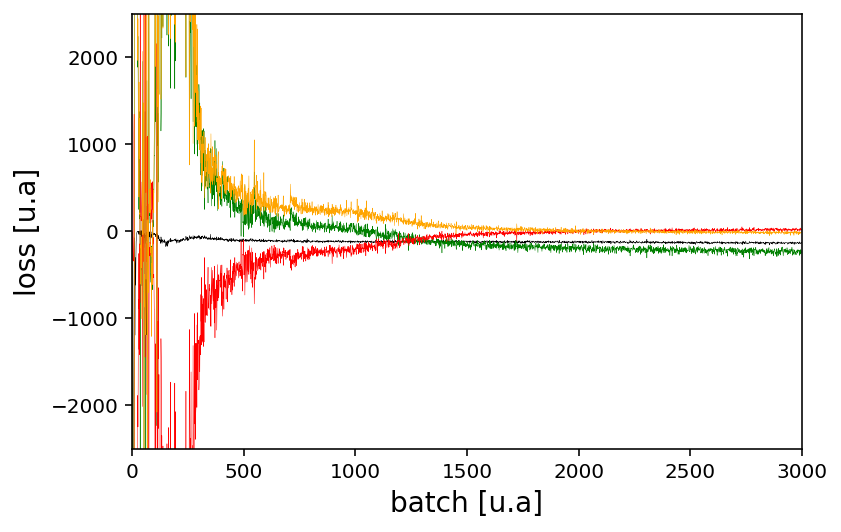

In [10]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch [u.a]', fontsize=14)
plt.ylabel('loss [u.a]', fontsize=14)

plt.xlim(0, len(gan.d_losses))
plt.ylim(-2500, 2500)

plt.show()
fig.savefig('5000Epochs.png', dpi=300,bbox_inches='tight')